In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import linalg
from sklearn.pipeline import make_pipeline
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from matplotlib.patches import Ellipse

In [120]:
# use if unsure where currently at
current_directory = os.getcwd() # uncomment below to print out
# print(current_directory)

In [121]:
ingredient_df = pd.read_csv('c:/Users/tv5jt/Documents/GitHub/group_template/.ipynb_checkpoints/ingre_data.csv')

In [122]:
ingredient_df = ingredient_df.dropna()
ingredient_df

,egg,flour,sugar,butter,vanilla extract,milk,evaporated milk,condensed milk,shortening,powdered sugar,cornmeal,soda,baking powder,oat,category
0,1.0,240.0,300.024,0.00,0.0,264.0,0.0,0.0,0.0,0.0,0.0,4.8,0.0,0.0,cake
1,0.0,240.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cake
2,1.0,120.0,0.000,28.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,cake
3,3.0,180.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cookie
4,2.0,240.0,300.024,0.00,0.0,264.0,0.0,0.0,0.0,0.0,0.0,7.2,0.0,0.0,cake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137156,2.0,240.0,400.032,0.00,0.0,264.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cake
137157,1.0,240.0,200.016,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cookie
137158,3.0,360.0,300.024,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cake
137159,2.0,300.0,250.020,226.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cookie


In [123]:
ingredient_df.describe()

,egg,flour,sugar,butter,vanilla extract,milk,evaporated milk,condensed milk,shortening,powdered sugar,cornmeal,soda,baking powder,oat
count,137161.000000,137161.000000,137161.000000,137161.000000,137161.000000,137161.000000,137161.000000,137161.000000,137161.000000,137161.000000,137161.000000,137161.000000,137161.000000,137161.000000
mean,2.248714,273.279977,233.306877,77.148970,0.251966,53.969715,0.628643,0.215097,15.885558,5.566849,0.768815,2.093176,1.795105,13.335519
std,1.754366,129.989645,182.319980,120.732056,1.532950,121.436677,12.900885,8.605308,58.991190,44.522214,12.541286,3.938897,4.427147,52.449938
min,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,240.000000,200.016000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,360.000000,400.032000,226.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000,0.000000,0.000000
max,15.000000,1440.000000,1400.112000,1413.000000,54.120000,990.000000,425.250000,459.360000,984.000000,961.536000,941.760000,198.450000,108.000000,961.920000


### Means and SDs vary across the columns

In [124]:
# Create X and y as original and target dataframes
X = ingredient_df.drop(columns = ['category']).copy()
y = ingredient_df['category'].copy()

In [125]:
# Standardize X
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean
X_scaled = X_centered / np.std(X_centered, axis = 0)

#### I'm certain this is gonna take an insane amount of time to run

In [126]:
# define scorer
def gmm_bic_score(estimator, X_scaled):
    # apply pca first 
    X_transformed = estimator.named_steps['pca'].transform(X_scaled)
    return -estimator.named_steps['gmm'].bic(X_transformed)

In [127]:
# make pipeline
pipeline = Pipeline([
    ('pca', PCA(random_state=48)),
    ('gmm', GaussianMixture(random_state=48))
])

In [128]:
# param grid
param_grid = {
    'pca__n_components': [2, 3, 4, 5, 6],
    'gmm__n_components': range(1, 7),
    'gmm__covariance_type': ['spherical', 'tied', 'diag', 'full'],
}

In [129]:
# grid search (absurd amount of time)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=gmm_bic_score,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_scaled)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(random_state=48)),
                                       ('gmm',
                                        GaussianMixture(random_state=48))]),
             n_jobs=-1,
             param_grid={'gmm__covariance_type': ['spherical', 'tied', 'diag',
                                                  'full'],
                         'gmm__n_components': range(1, 7),
                         'pca__n_components': [2, 3, 4, 5, 6]},
             scoring=<function gmm_bic_score at 0x00000234CEFE1080>, verbose=2)

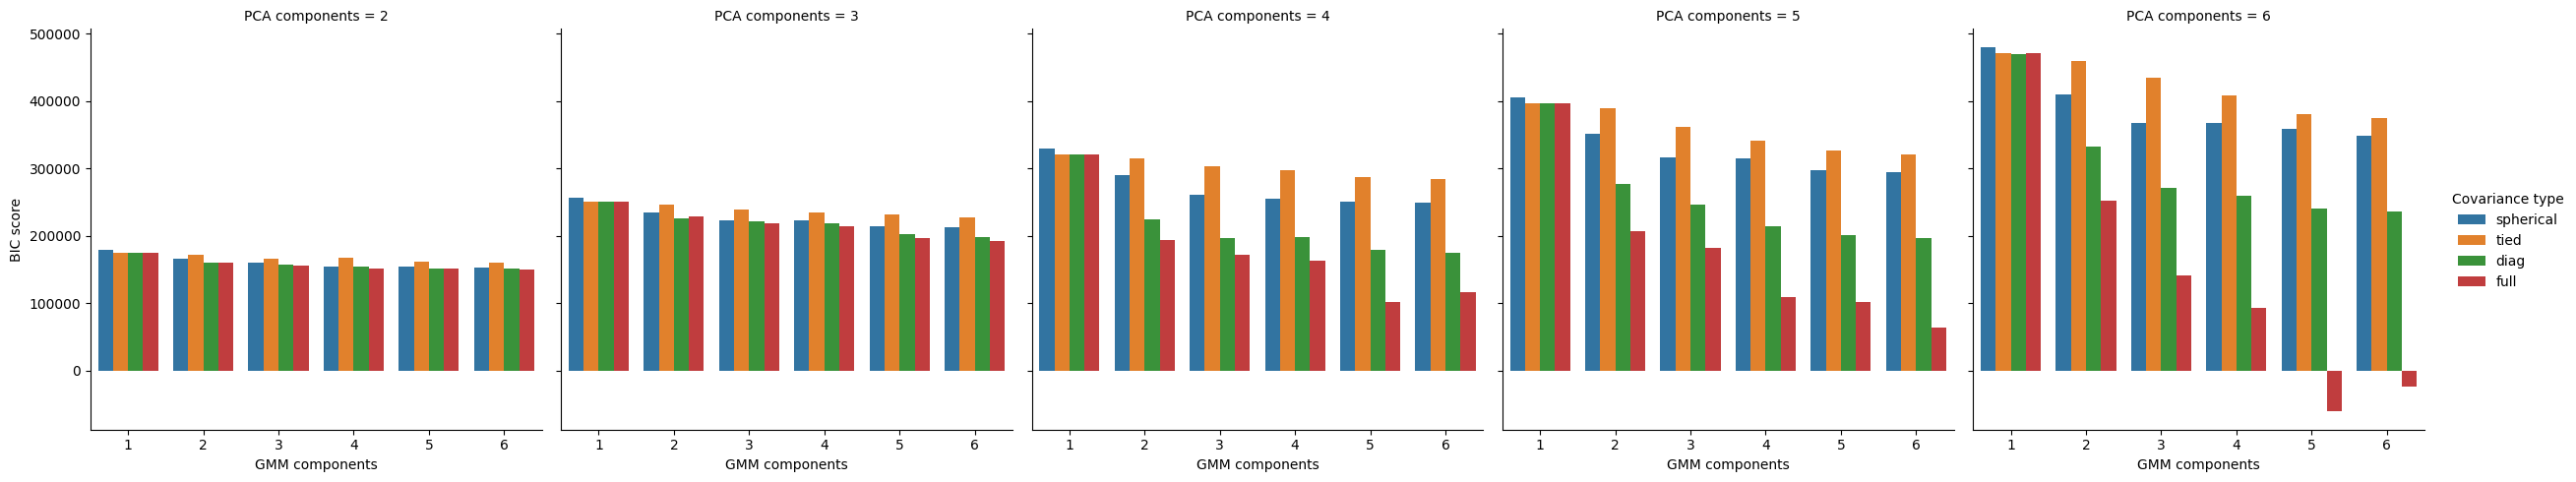

In [130]:
# getting scores
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_pca__n_components", "param_gmm__n_components", "param_gmm__covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_pca__n_components": "PCA components",
        "param_gmm__n_components": "GMM components",
        "param_gmm__covariance_type": "Covariance type",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

# plot BIC scores
sns.catplot(
    data=df,
    kind="bar",
    x="GMM components",
    y="BIC score",
    hue="Covariance type",
    col="PCA components"
)
plt.show()

#### From the image, the lowest (most negative) BIC score has 6 principal components, and 6 clusters (n_components in the GMM). Let's plot this out.

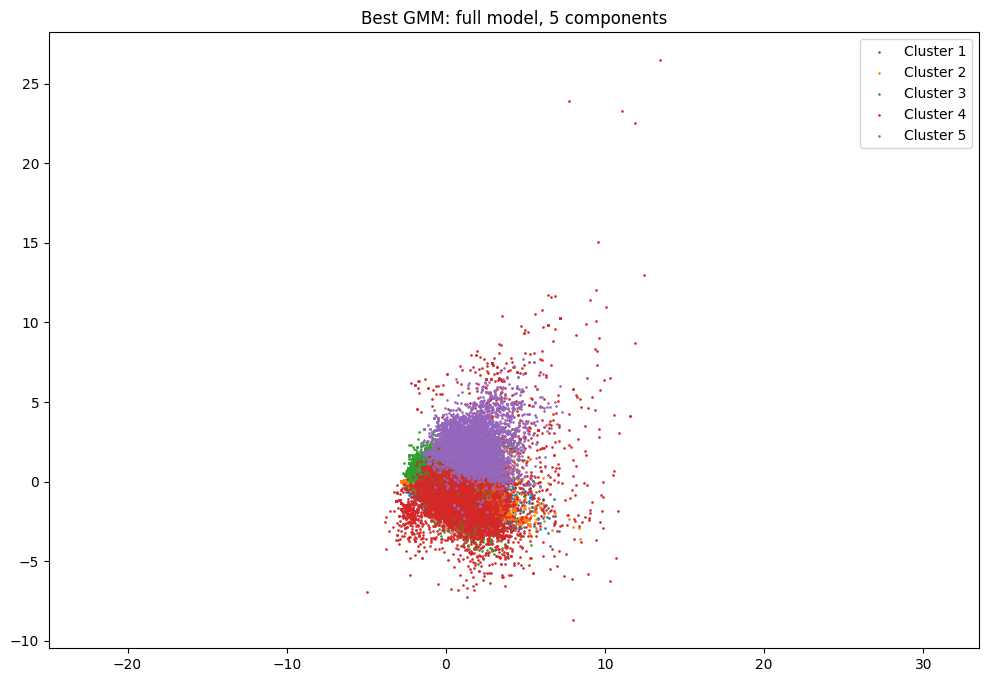

In [131]:
# plot best
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

best_gmm = grid_search.best_estimator_['gmm']
best_gmm.fit(X_pca)
Y_ = best_gmm.predict(X_pca)

color_iter = sns.color_palette("tab10", n_colors=best_gmm.n_components)
fig, ax = plt.subplots(figsize=(12, 8))

for i, (mean, covar, color) in enumerate(zip(best_gmm.means_, best_gmm.covariances_, color_iter)):
    if best_gmm.covariance_type != 'spherical':
        v, w = linalg.eigh(covar)  # eigenvalues and eigenvectors, in spherical case the covariance is given by a single variance
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    else:
        v = [2.0 * np.sqrt(2.0) * np.sqrt(covar)] * 2
        w = np.eye(best_gmm.means_.shape[1])
    
    # angle of ellipse
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi   

    # draw ellipse
    ellipse = Ellipse(xy=mean, width=v[0], height=v[1], angle=angle, color=color, alpha=0.5)
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)
    ax.scatter(X_pca[Y_ == i, 0], X_pca[Y_ == i, 1], s=0.8, color=color, label=f'Cluster {i+1}')

plt.title(f'Best GMM: {best_gmm.covariance_type} model, {best_gmm.n_components} components')
plt.legend()
plt.axis('equal')
plt.show()

#### From the image above, it seems that there are many overlapping clusters, and that they are not very distinct.

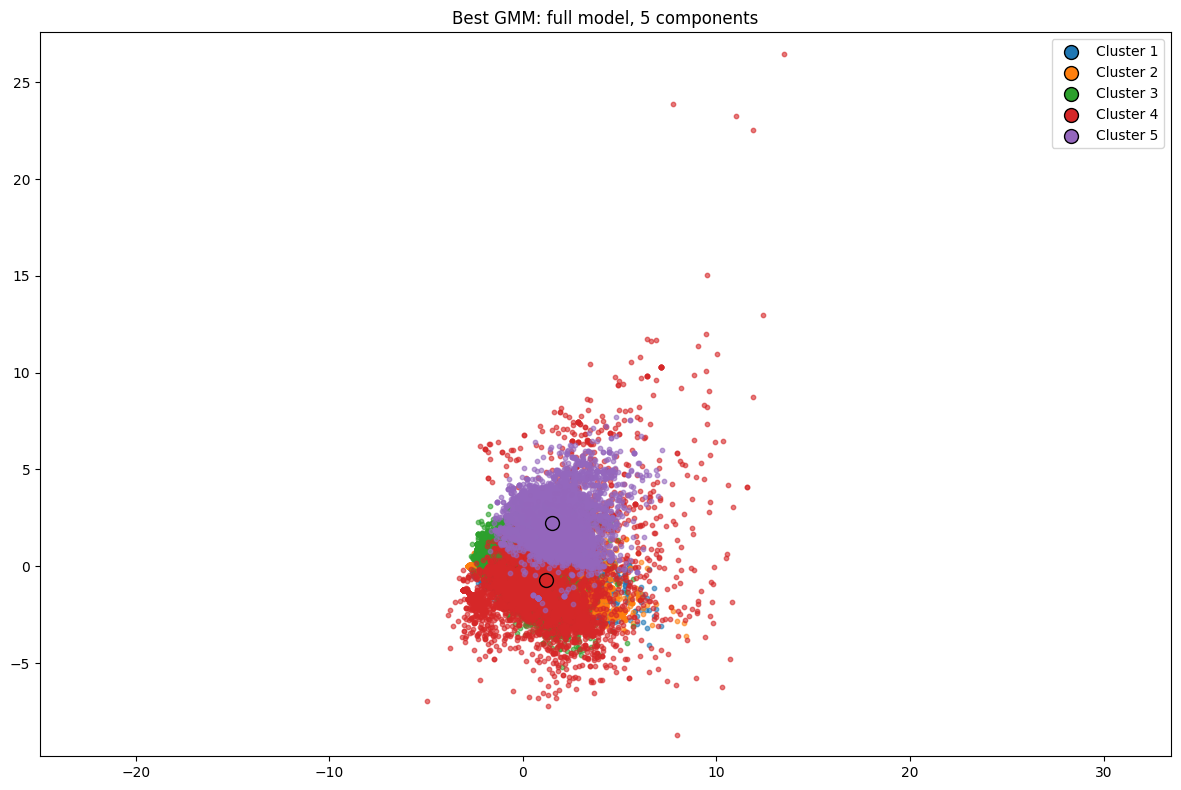

In [132]:
color_iter = sns.color_palette("tab10", n_colors=best_gmm.n_components)

fig, ax = plt.subplots(figsize=(12, 8))  

for i, (mean, covar, color) in enumerate(zip(best_gmm.means_, best_gmm.covariances_, color_iter)):
    # spherical calculation is different
    if best_gmm.covariance_type != 'spherical':
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    else:
        v = [2.0 * np.sqrt(2.0) * np.sqrt(covar)] * 2
        w = np.eye(best_gmm.means_.shape[1])
    
    # angle of ellipse
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi

    # draw ellipse
    ellipse = Ellipse(xy=mean, width=v[0], height=v[1], angle=angle, color=color, alpha=0.3) 
    ax.add_artist(ellipse)

    cluster_data = X_pca[Y_ == i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=10, color=color, alpha=0.6)  
    ax.scatter(mean[0], mean[1], s=100, color=color, edgecolors='black', label=f'Cluster {i+1}') 

ax.set_title(f'Best GMM: {best_gmm.covariance_type} model, {best_gmm.n_components} components')
ax.legend()
ax.axis('equal')
plt.tight_layout()
plt.show()

### All possible combinations

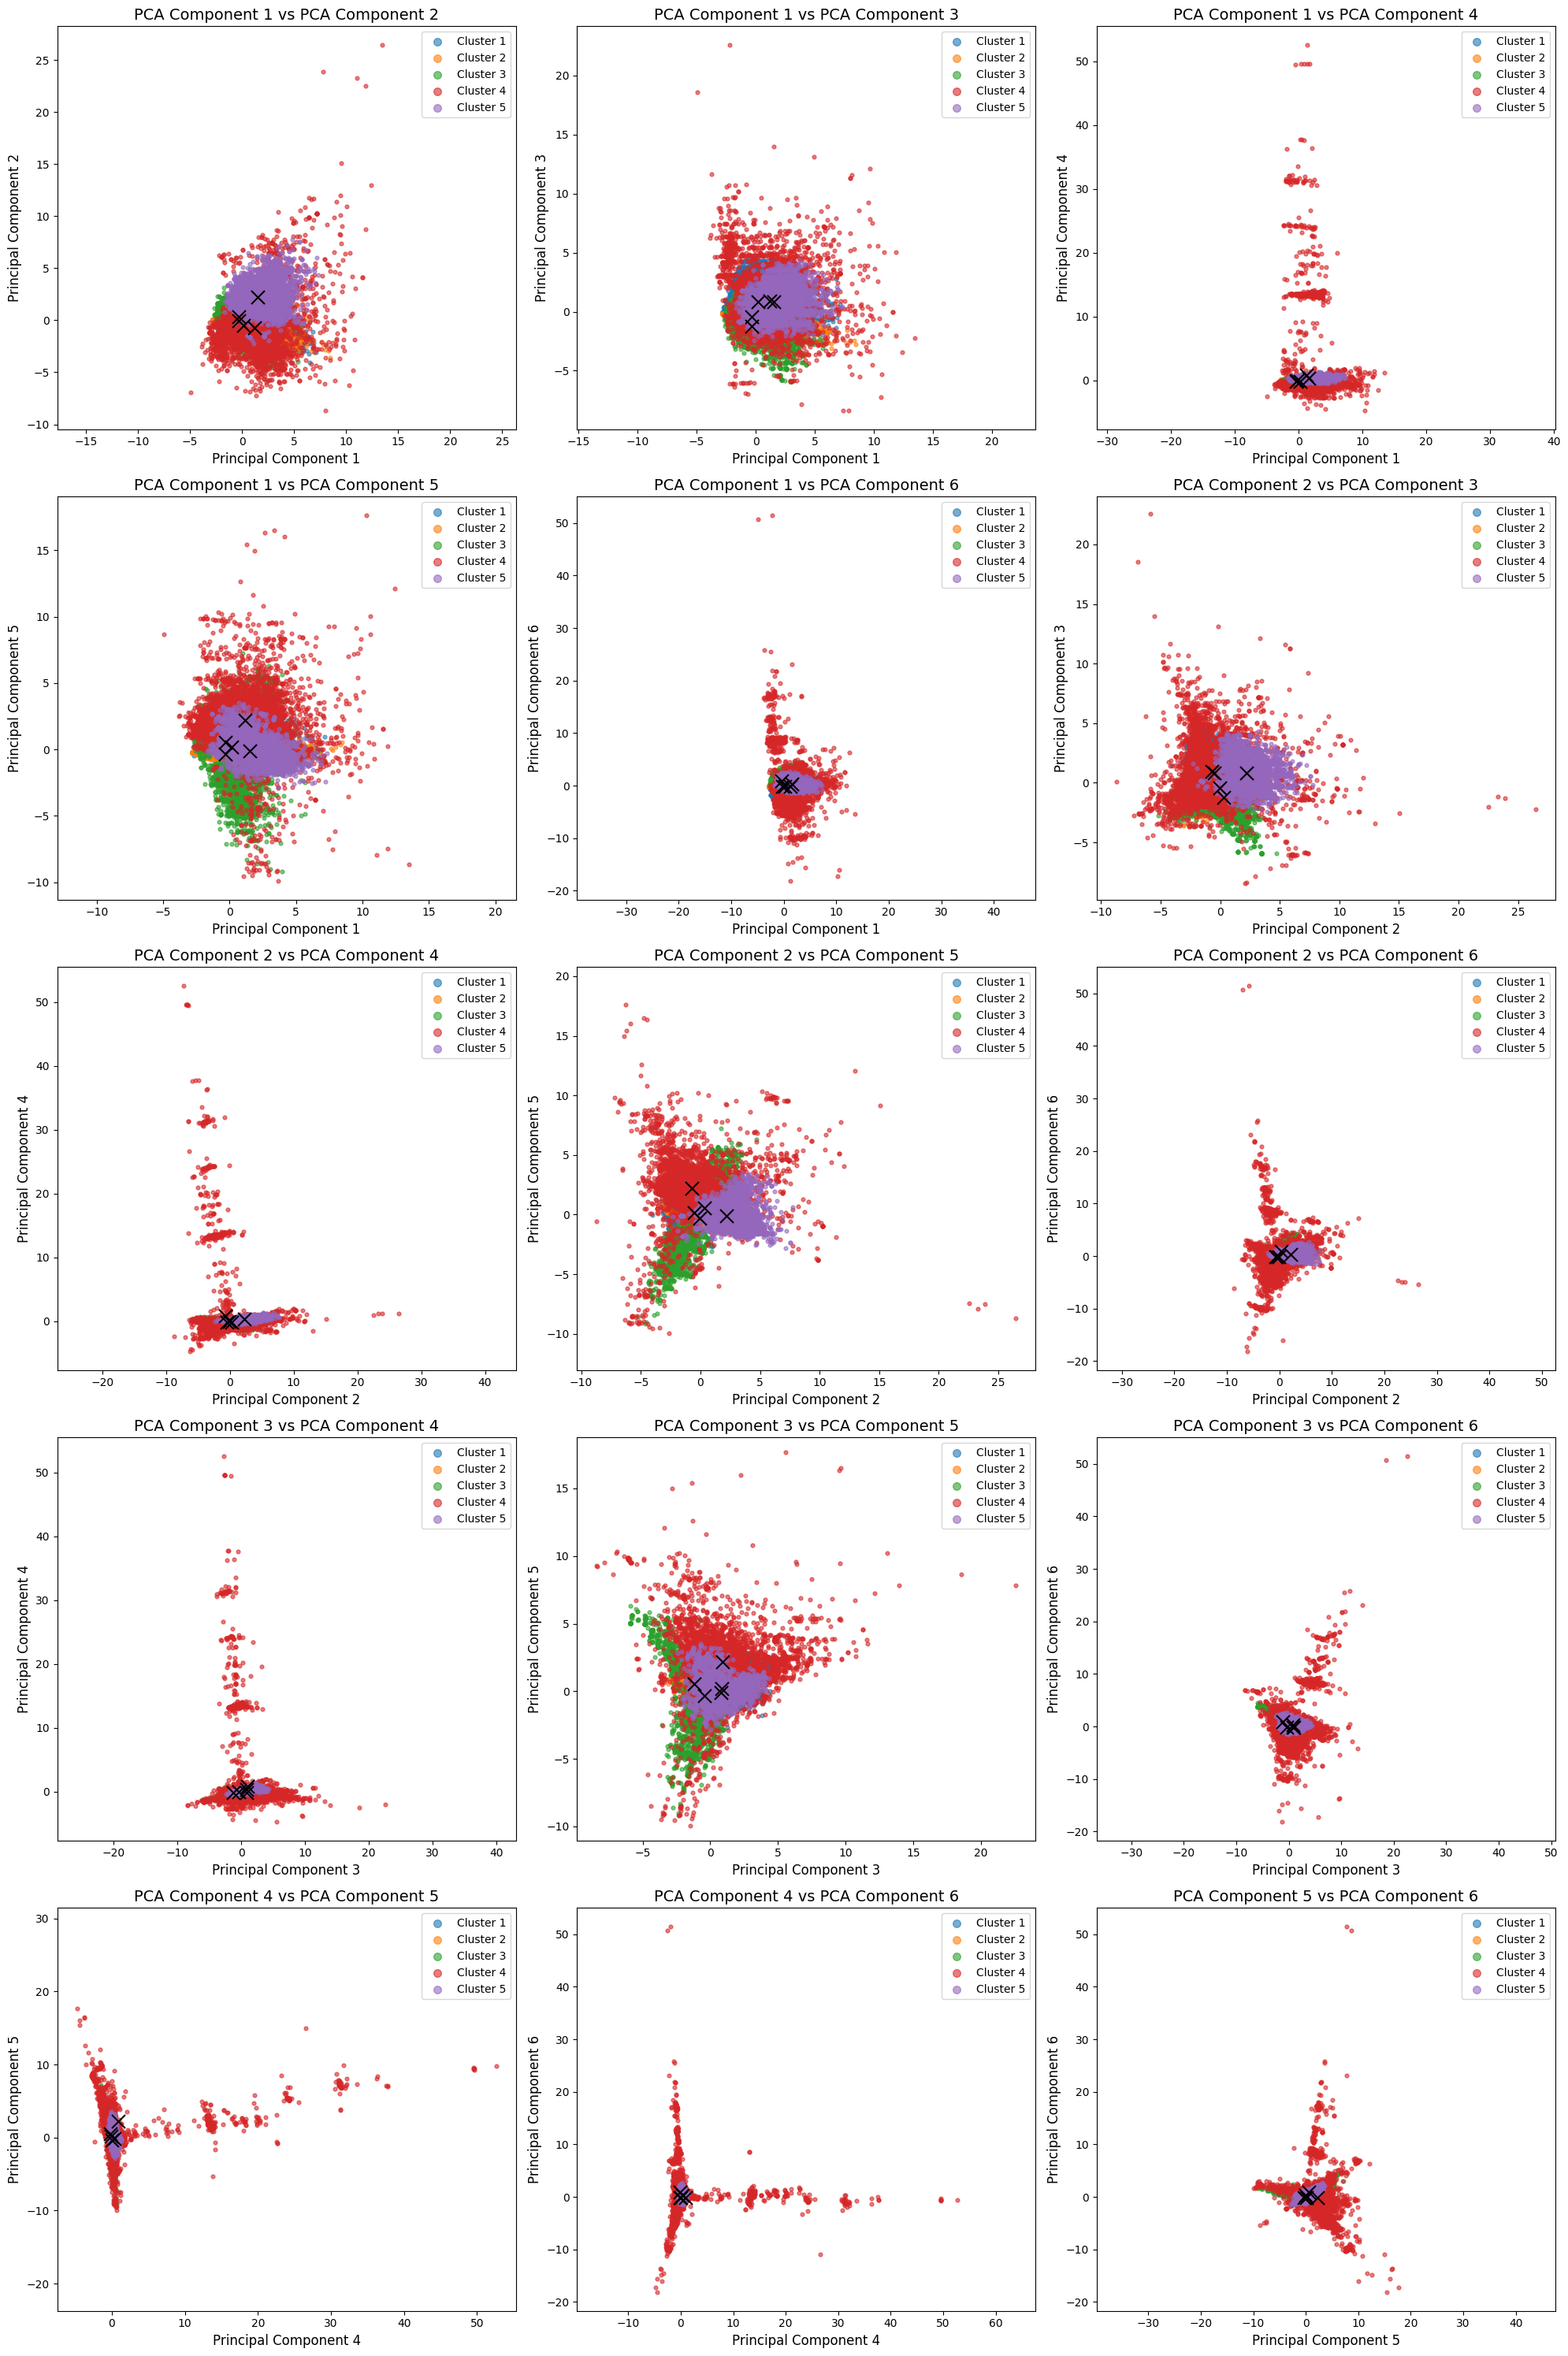

In [133]:
pc_combinations = list(combinations(range(6), 2))

# make it super big so it's visible
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))
ax = axes.flatten()

for i, (pc1, pc2) in enumerate(pc_combinations):
    for cluster_num, (mean, covar, color) in enumerate(zip(best_gmm.means_, best_gmm.covariances_, color_iter)):
        cluster_data = X_pca[Y_ == cluster_num]

        ax[i].scatter(cluster_data[:, pc1], cluster_data[:, pc2], s=12, color=color, alpha=0.6, label=f'Cluster {cluster_num+1}')
    
    ax[i].scatter(best_gmm.means_[:, pc1], best_gmm.means_[:, pc2], s=150, color='black', marker='x')
    ax[i].set_title(f'PCA Component {pc1+1} vs PCA Component {pc2+1}', fontsize=14)
    ax[i].set_xlabel(f'Principal Component {pc1+1}', fontsize=12)
    ax[i].set_ylabel(f'Principal Component {pc2+1}', fontsize=12)
    ax[i].legend(markerscale=2)
    ax[i].axis('equal')
plt.tight_layout()
plt.show()

#### Maybe too complex, potentially viable to just reduce the amount of clusters to 3 given prior information about the dataset.

In [134]:
# make pipeline
pipeline = Pipeline([
    ('pca', PCA(random_state=42)),
    ('gmm', GaussianMixture(random_state=42))
])

# param grid
param_grid = {
    'pca__n_components': [2, 3, 4, 5, 6],
    'gmm__n_components': [3],
    'gmm__covariance_type': ['spherical', 'tied', 'diag', 'full'],
}

In [135]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=gmm_bic_score,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_scaled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('gmm',
                                        GaussianMixture(random_state=42))]),
             n_jobs=-1,
             param_grid={'gmm__covariance_type': ['spherical', 'tied', 'diag',
                                                  'full'],
                         'gmm__n_components': [3],
                         'pca__n_components': [2, 3, 4, 5, 6]},
             scoring=<function gmm_bic_score at 0x00000234CEFE1080>, verbose=2)

In [136]:
best_pca_components = grid_search.best_params_['pca__n_components']
print(f'Best number of PCA components: {best_pca_components}')

Best number of PCA components: 6


In [137]:
best_gmm = grid_search.best_estimator_['gmm']
best_gmm.fit(X_pca)
best_pca = grid_search.best_estimator_['pca']
X_pca = best_pca.fit_transform(X_scaled)
Y_ = best_gmm.predict(X_pca)

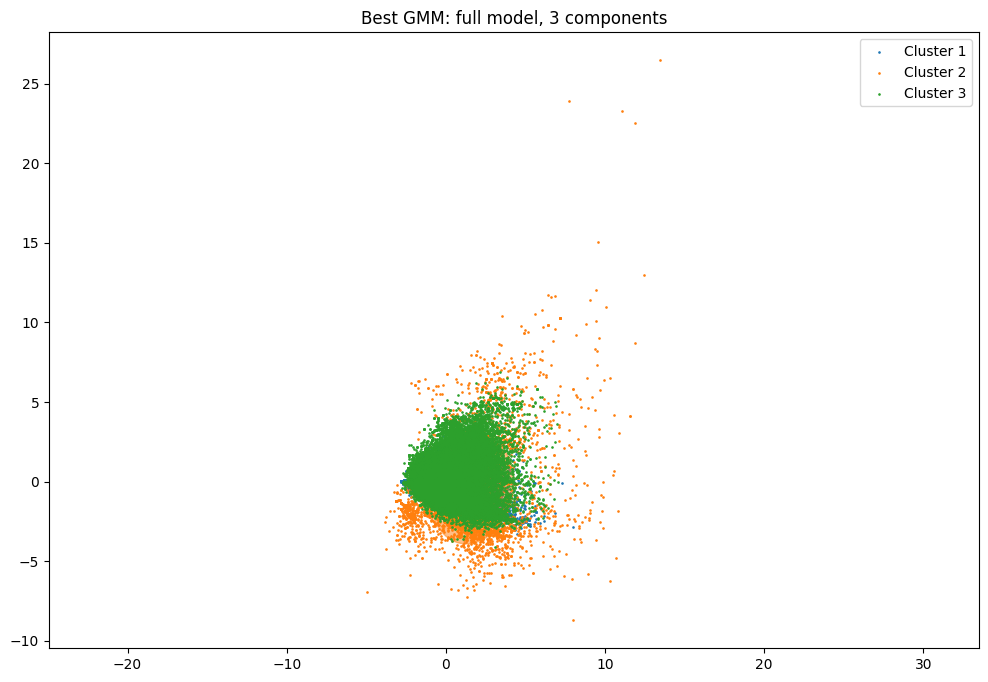

In [138]:
color_iter = sns.color_palette("tab10", n_colors=best_gmm.n_components)
fig, ax = plt.subplots(figsize=(12, 8))

for i, (mean, covar, color) in enumerate(zip(best_gmm.means_, best_gmm.covariances_, color_iter)):
    if best_gmm.covariance_type != 'spherical':
        v, w = linalg.eigh(covar)  # eigenvalues and eigenvectors, in spherical case the covariance is given by a single variance
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    else:
        v = [2.0 * np.sqrt(2.0) * np.sqrt(covar)] * 2
        w = np.eye(best_gmm.means_.shape[1])
    
    # angle of ellipse
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi   

    # draw ellipse
    ellipse = Ellipse(xy=mean, width=v[0], height=v[1], angle=angle, color=color, alpha=0.5)
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)
    ax.scatter(X_pca[Y_ == i, 0], X_pca[Y_ == i, 1], s=0.8, color=color, label=f'Cluster {i+1}')

plt.title(f'Best GMM: {best_gmm.covariance_type} model, {best_gmm.n_components} components')
plt.legend()
plt.axis('equal')
plt.show()

#### The clustering provided by these different inputs seems worse than the one created earlier.

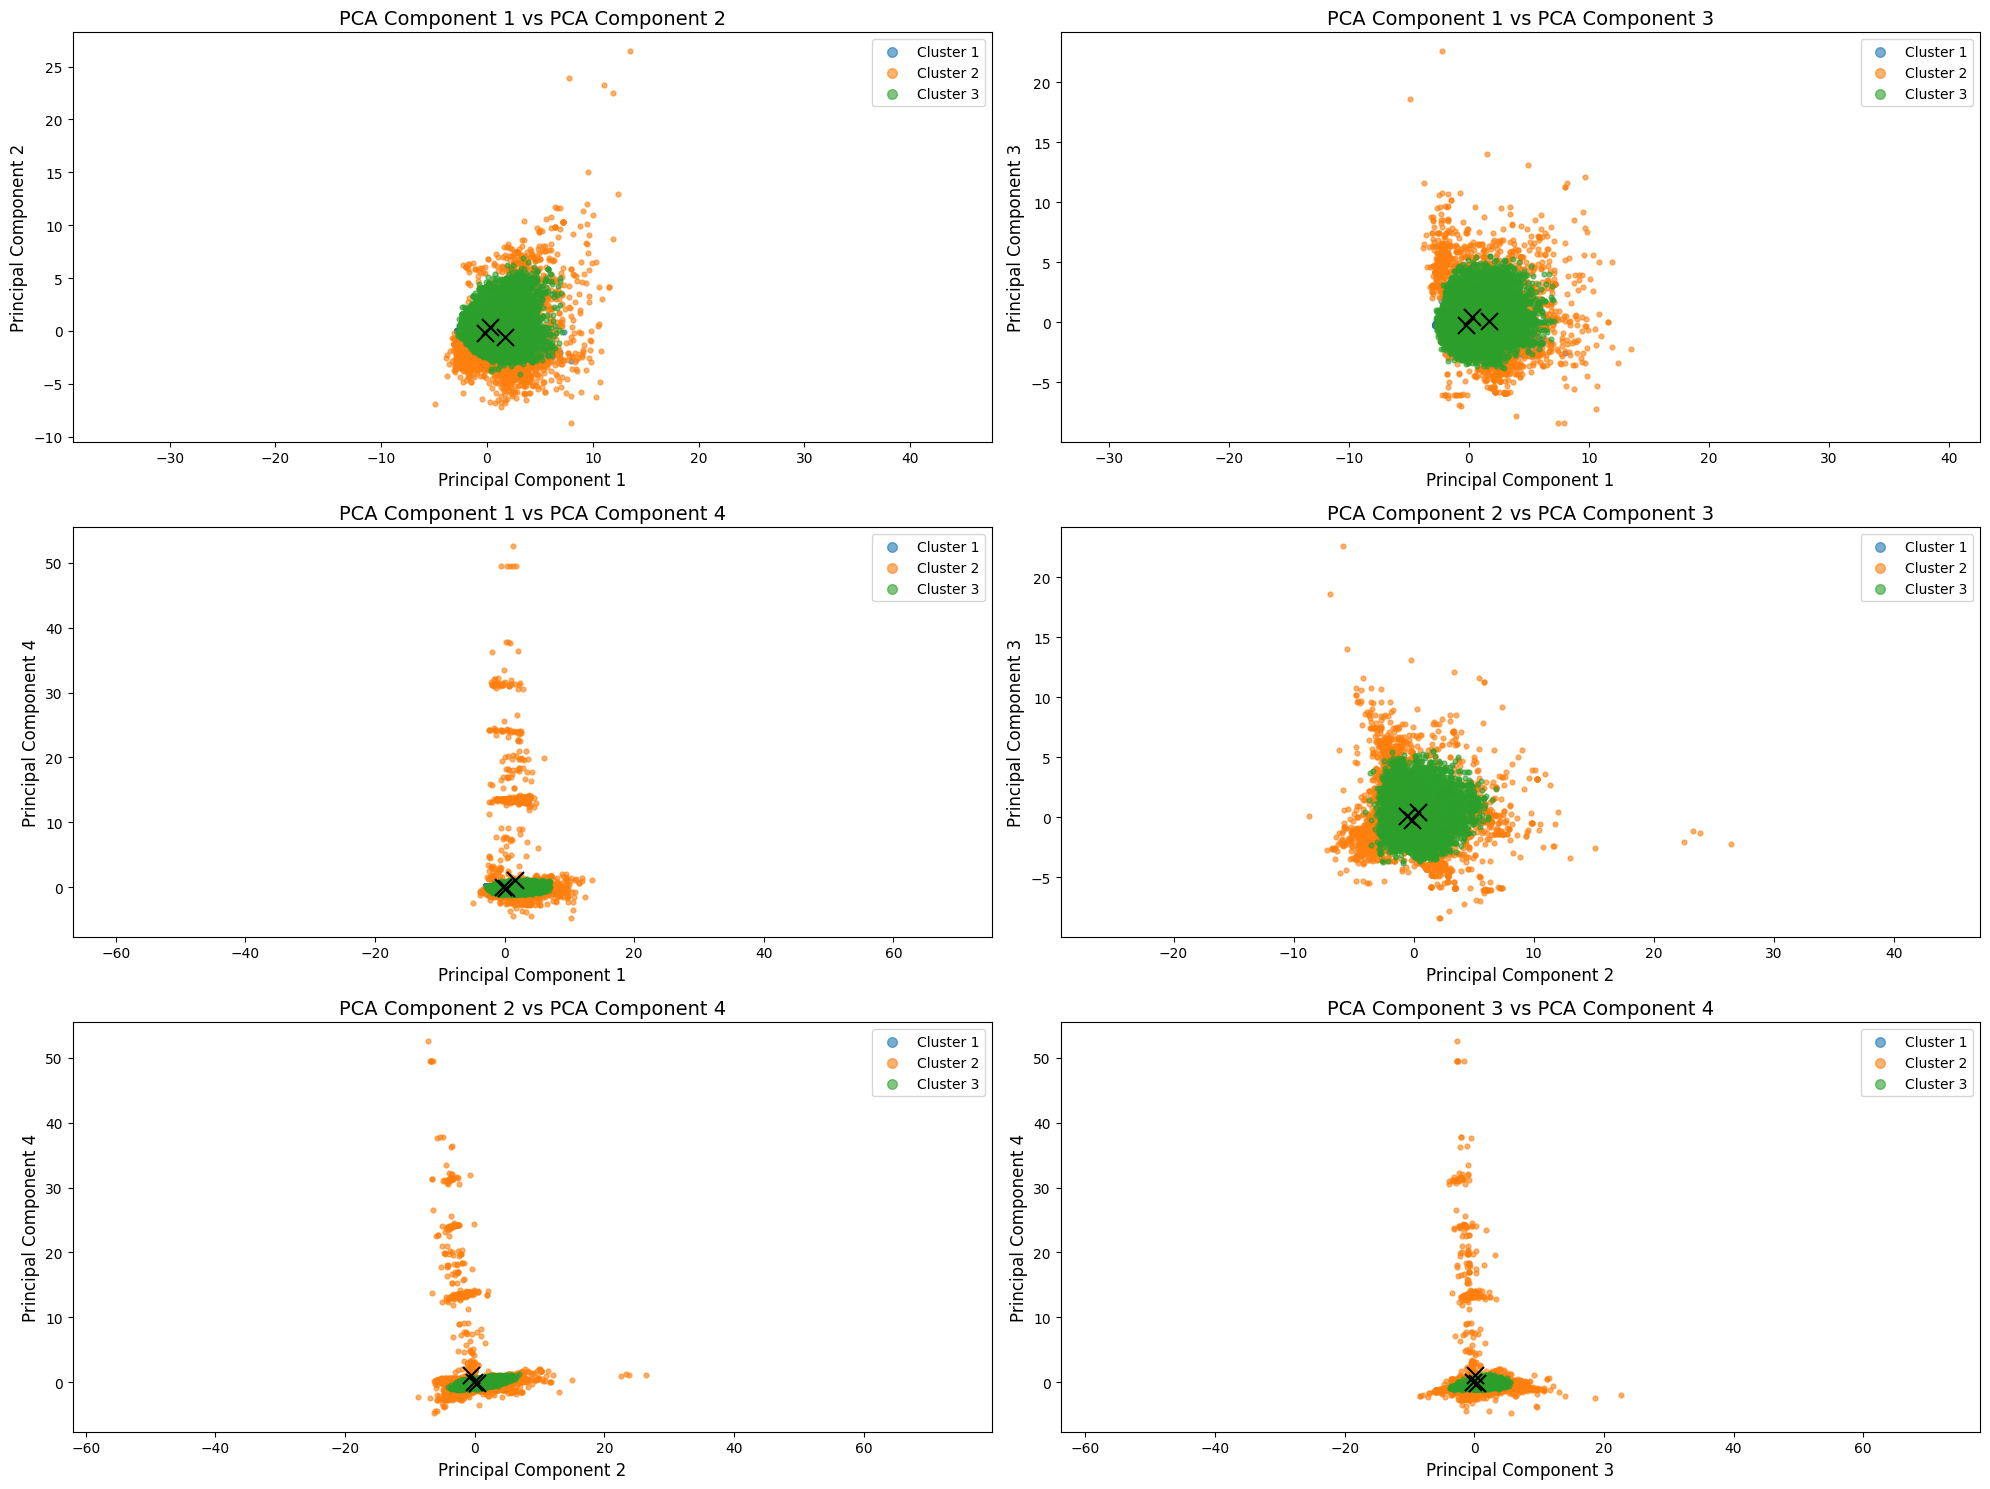

In [139]:
pc_combinations = list(combinations(range(4), 2))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
ax = axes.flatten()

for i, (pc1, pc2) in enumerate(pc_combinations):
    for cluster_num, (mean, covar, color) in enumerate(zip(best_gmm.means_, best_gmm.covariances_, color_iter)):
        ax[i].scatter(X_pca[Y_ == cluster_num][:, pc1], X_pca[Y_ == cluster_num][:, pc2], s=12, color=color, alpha=0.6, label=f'Cluster {cluster_num+1}')
    
    ax[i].scatter(best_gmm.means_[:, pc1], best_gmm.means_[:, pc2], s=150, color='black', marker='x')
    ax[i].set_title(f'PCA Component {pc1+1} vs PCA Component {pc2+1}', fontsize=14)
    ax[i].set_xlabel(f'Principal Component {pc1+1}', fontsize=12)
    ax[i].set_ylabel(f'Principal Component {pc2+1}', fontsize=12)
    ax[i].legend(markerscale=2)
    ax[i].axis('equal')
plt.tight_layout()
plt.show()

#### So it seems that keeping the amount of clusters low made the clustering worse than keeping a high number of clusters in the GMM. Very interesting.

#### In summary, the data seems to contain many clusters (more than 3), and thus the BIC scores calculated earlier are actually fairly reliable. For the GMM model, it seems that maintaining a high amount of clusters obtains the best results for clustering, but the clustering method itself isn't probably the best suited for this dataset. Maybe T-SNE or UMAP can display the true clusters more accurately than GMM.